## Вопросы по предыдущей лекции

1. Есть полином 4 степени. Есть многослойный персептрон с линейной функцией активации. Сколько скрытых слоев надо, чтобы аппроксимировать данный полином?
2. 3х3 свертка, 3 канала на вход, 64 на выход, страйд 1, паддинг 1, без bias. Сколько параметров?

### Dropout

Dropout — это метод регуляризации, используемый в нейронных сетях для предотвращения переобучения. Основная идея состоит в случайном "выключении" (то есть обнулении) нейронов во время обучения. Это помогает сделать сеть менее чувствительной к конкретным весам нейронов, улучшая её обобщающую способность.

Формула dropout выглядит примерно так:

$$
y = x \odot m
$$

где:
- $ x $ — входной тензор (например, активации слоя нейронной сети).
- $ m $ — маска из нулей и единиц, сгенерированная с заданной вероятностью dropout. Вероятность dropout определяет, какая доля нейронов будет "выключена". Например, если вероятность dropout равна 0.5, то в среднем половина нейронов будет выключена.
- $ y $ — результат после применения dropout к $ x $.
- $ \odot $ — операция поэлементного умножения.

Таким образом, на каждом шаге обучения активируются только часть нейронов, что способствует разнообразию путей, по которым распространяется сигнал в сети.

<img width=600 src='https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-23_at_6.19.24_PM.png' />

### Transfer Learning

Transfer Learning (перенос обучения) — это использование модели, обученной на одной задаче, для решения другой, схожей задачи. Основная идея состоит в том, чтобы взять предварительно обученную модель (например, на большом наборе данных, таком как ImageNet) и адаптировать её к новой задаче.

Процесс может включать в себя:
1. Замораживание весов начальных слоев (они улавливают общие признаки).
2. Настройка или замена последних слоев для новой задачи.
3. Дообучение модели на новом наборе данных.

<img width=700 src='https://www.researchgate.net/publication/342400905/figure/fig4/AS:905786289057792@1592967688003/The-architecture-of-our-transfer-learning-model.jpg' />

## Векторизация текста

### Вступление

Модели машинного обучения в их первозданном виде не способны напрямую обрабатывать текстовые данные. В отличие от численных входных данных, которые машины могут легко интерпретировать и анализировать, текст представляет собой сложную структуру, полную нюансов и семантических связей. Чтобы сделать текстовую информацию доступной для алгоритмов машинного обучения, необходимо преобразовать её в численные векторы, которые эффективно передают смысловую нагрузку слов и фраз.

Этот процесс преобразования, известный как векторизация текста, является ключевым шагом в предварительной обработке данных для текстового анализа. Существует множество методов векторизации, каждый из которых имеет свои особенности и наилучшим образом подходит для определенных задач. От правильного выбора метода векторизации может зависеть эффективность и точность моделей машинного обучения. 

Далее рассмотрим некоторые из наиболее распространенных и эффективных методов векторизации текста.

Векторизация текста — это процесс преобразования текста в числовые векторы, которые можно использовать в машинном обучении. Вот несколько основных стратегий векторизации текста:

### 1. One-Hot Encoding

**Описание**: 
- Каждое слово представлено вектором, где один элемент равен 1 (позиция соответствует слову), а остальные — 0.

### 2. Bag of Words (BOW)

**Описание**: 
- Текст преобразуется в мешок слов, где каждое слово становится признаком, а его значение — это количество его появлений в тексте.

$$
\text{BoW}_{\text{word}} = \text{Количество вхождений слова в документ}
$$

<img width=500 src='https://user.oc-static.com/upload/2022/12/08/16705125107088_16034397439042_surfin%20bird%20bow.png' />

### 2. TF-IDF (Term Frequency-Inverse Document Frequency)

**Описание**: 

TF-IDF - это статистическая мера, используемая для оценки важности слова в документе, который является частью коллекции или корпуса. Она увеличивается пропорционально количеству раз, когда слово появляется в документе, но уменьшается с частотой его появления в корпусе. Формулы для расчета TF и IDF:

- Term Frequency (TF): 
  $$
  \text{TF}_{\text{word}} = \frac{\text{Количество вхождений слова в документ}}{\text{Общее количество слов в документе}}
  $$

- Inverse Document Frequency (IDF):
  $$
  \text{IDF}_{\text{word}} = \log \left(\frac{\text{Общее количество документов в корпусе}}{\text{Количество документов, содержащих слово}}\right)
  $$

Таким образом, TF-IDF для слова в документе рассчитывается как:

$$
\text{TF-IDF}_{\text{word}} = \text{TF}_{\text{word}} \times \text{IDF}_{\text{word}}
$$

#### Пример
Предложение A: The car is driven on the road.

Предложение B: The truck is driven on the highway.

<img width=500 src='https://cdn-media-1.freecodecamp.org/images/1*q3qYevXqQOjJf6Pwdlx8Mw.png' />

### 3. Word Embeddings (Word2Vec)

**Описание**: 
- Каждому слову сопоставляется вектор фиксированной длины. Эти векторы обучаются так, чтобы отражать семантические и синтаксические отношения между словами.

**Пример**:
- Использование предобученных моделей Word2Vec или GloVe.

### Word2Vec: Подход к Векторизации Слов

Word2Vec — это популярная модель для преобразования слов в векторы. Эти векторы отражают контекстное значение слов и их взаимосвязи. Word2Vec использует нейронные сети для обучения векторных представлений слов и может быть обучен двумя разными способами: с использованием модели "Skip-Gram" и "CBOW" (Continuous Bag of Words).

<img width=500 src='https://kavita-ganesan.com/wp-content/uploads/skipgram-vs-cbow-continuous-bag-of-words-word2vec-word-representation.png' />

#### 1. Skip-Gram Model

В модели Skip-Gram центральное слово используется для предсказания контекстных слов. Например, если у нас есть предложение "Кот ест рыбу", и мы выбираем "ест" в качестве центрального слова, модель Skip-Gram попытается предсказать "Кот" и "рыбу" на основе слова "ест".

- Преимущества: хорошо работает с редкими словами, эффективно улавливает распределение слов в больших корпусах.
- Недостатки: медленнее в обучении по сравнению с CBOW, требует больше вычислительных ресурсов.

В Skip-Gram мы предсказываем контекстные слова из центрального слова. Для слова $ w_i $ и его контекстных слов $ C(w_i) $, функция потерь (Loss Function) для Skip-Gram модели:

$$
L = -\frac{1}{T} \sum_{i=1}^{T} \sum_{-m \leq j \leq m, j \neq 0} \log p(w_{i+j} | w_i)
$$

где:
- $ T $ - общее количество слов в корпусе.
- $ m $ - размер контекстного окна.
- $ p(w_{i+j} | w_i) $ - вероятность появления слова $ w_{i+j} $ при условии, что текущее слово есть $ w_i $. Эта вероятность обычно вычисляется с помощью softmax функции.

#### 2. Continuous Bag of Words (CBOW)

Модель CBOW работает наоборот по сравнению со Skip-Gram. Здесь контекстные слова используются для предсказания центрального слова. Если взять то же предложение "Кот ест рыбу", CBOW будет использовать "Кот" и "рыбу" для предсказания слова "ест".

- Преимущества: быстрее в обучении, эффективнее использует память.
- Недостатки: менее точна для редких слов, хуже улавливает более широкие контекстные отношения.

В CBOW мы предсказываем центральное слово из контекстных слов. Для слова $ w_i $ и его контекстных слов $ C(w_i) $, функция потерь для CBOW модели:

$$
L = -\frac{1}{T} \sum_{i=1}^{T} \log p(w_i | C(w_i))
$$

где:
- $ T $ - общее количество слов в корпусе.
- $ C(w_i) $ - контекстное окно вокруг слова $ w_i $.
- $ p(w_i | C(w_i)) $ - вероятность появления слова $ w_i $, учитывая его контекст $ C(w_i) $. Эта вероятность также обычно вычисляется через softmax функцию.

#### Векторы Word2Vec

Векторы, созданные с помощью Word2Vec, обладают несколькими интересными свойствами:
- Они улавливают семантические отношения между словами, так что слова с похожими значениями имеют похожие векторы.
- Вектора могут служить основой для различных операций, таких как вычисление семантической близости между словами или даже решение аналогий (например, "Король" - "Мужчина" + "Женщина" ≈ "Королева").

Word2Vec требует большого корпуса текста для обучения и часто обучается на очень больших текстовых данных (например, всему содержимому Википедии) для создания эффективных векторных представлений.

[Визуализация векторов](https://projector.tensorflow.org/)

### 6. Современные нейронные сети (Transformers)

**Описание**: 
- Современные модели, основанные на архитектуре трансформеров, способные учитывать контекст и порядок слов для генерации векторного представления текста.

**Пример**:
- Использование предобученных моделей BERT, GPT и т.д.

Каждая из этих стратегий имеет свои преимущества и подходит для различных типов задач текстового анализа.

#### Задача на Подсчет TF-IDF

Предположим, у нас есть корпус из трех документов:

1. "Кот любит рыбу"
2. "Кот любит молоко"
3. "Собака любит кости"

Рассчитаем TF-IDF для слова "любит" в первом документе.

**Решение:**

1. Расчет TF для слова "любит" в первом документе:
   - Количество вхождений слова "любит": 1
   - Общее количество слов в документе: 3
   - $\text{TF} = \frac{1}{3}$

2. Расчет IDF для слова "любит":
   - Общее количество документов: 3
   - Количество документов, содержащих слово "любит": 3
   - $\text{IDF} = \log\left(\frac{3}{3}\right) = \log(1) = 0$

Таким образом, TF-IDF для слова "любит" в первом документе равно:

$$
\text{TF-IDF} = \frac{1}{3} \times 0 = 0
$$

Это нулевое значение TF-IDF указывает на то, что слово "любит" не имеет уникальной важности в данном документе по сравнению с другими документами в корпусе.

In [9]:
# BoW

from sklearn.feature_extraction.text import CountVectorizer
texts = ["I love writing code in Python", "I love Python code", "Python is great"]
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(texts)

print(vectorizer.get_feature_names())
print(bow.toarray())

vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2))
bow = vectorizer.fit_transform(texts)

print(vectorizer.get_feature_names())
print(bow.toarray())

['code', 'great', 'in', 'is', 'love', 'python', 'writing']
[[1 0 1 0 1 1 1]
 [1 0 0 0 1 1 0]
 [0 1 0 1 0 1 0]]
['code in', 'in python', 'is great', 'love python', 'love writing', 'python code', 'python is', 'writing code']
[[1 1 0 0 1 0 0 1]
 [0 0 0 1 0 1 0 0]
 [0 0 1 0 0 0 1 0]]


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(texts)

print(vectorizer.get_feature_names())
print(tfidf.toarray())

['code', 'great', 'in', 'is', 'love', 'python', 'writing']
[[0.40619178 0.         0.53409337 0.         0.40619178 0.31544415
  0.53409337]
 [0.61980538 0.         0.         0.         0.61980538 0.48133417
  0.        ]
 [0.         0.65249088 0.         0.65249088 0.         0.38537163
  0.        ]]


## Задача Next Token Prediction

**Токен** в контексте обработки естественного языка (Natural Language Processing, NLP) представляет собой базовую единицу текста, на которую разбивается исходный текст для анализа или обработки. Токенизация — это процесс разделения текста на такие токены.

Next token prediction модель — это тип языковой модели, используемой в обработке естественного языка, который предсказывает следующий токен (или слово) на основе предыдущих токенов в последовательности. Эти модели обычно основаны на глубоком обучении и используются в таких приложениях, как автоматическое завершение текста, генерация текста и машинный перевод.

1. **Модель предсказывает вероятности**: Пусть $ P(w_n | w_1, w_2, ..., w_{n-1}) $ будет вероятностью того, что следующим словом будет $ w_n $, учитывая предыдущую последовательность слов $ w_1, w_2, ..., w_{n-1} $.

2. **Логарифм правдоподобия**: Вместо работы с вероятностями напрямую, часто используется логарифм вероятности. Причина в том, что произведение вероятностей множества событий может привести к очень маленьким числам, что вызывает числовую нестабильность. Логарифм преобразует произведения в суммы, что упрощает вычисления:

   $$ \log P(w_n | w_1, w_2, ..., w_{n-1}) = $$
   $$ = \log P(w_1) + \log P(w_2 | w_1) + \log P(w_3 | w_1, w_2) + \ldots + \log P(w_n | w_1, w_2, ..., w_{n-1})$$

3. **Использование для предсказания**: При предсказании следующего слова модель выбирает слово, которое максимизирует логарифм правдоподобия, то есть наиболее вероятно в данном контексте.

In [11]:
# Пример упрощенной модели, которая придумывает имена

words = [i.lower() for i in open('names.txt', 'r').read().splitlines()]

print(f"10 имен из names.txt:\n{words[:10]}")
print(f"Всего имен: {len(words)}")
print(f"Самое короткое имя: {min(len(w) for w in words)}")
print(f"Самое длинное имя: {max(len(w) for w in words)}")

10 имен из names.txt:
['michael', 'christopher', 'jessica', 'matthew', 'ashley', 'jennifer', 'joshua', 'amanda', 'daniel', 'david']
Всего имен: 18239
Самое короткое имя: 2
Самое длинное имя: 15


{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


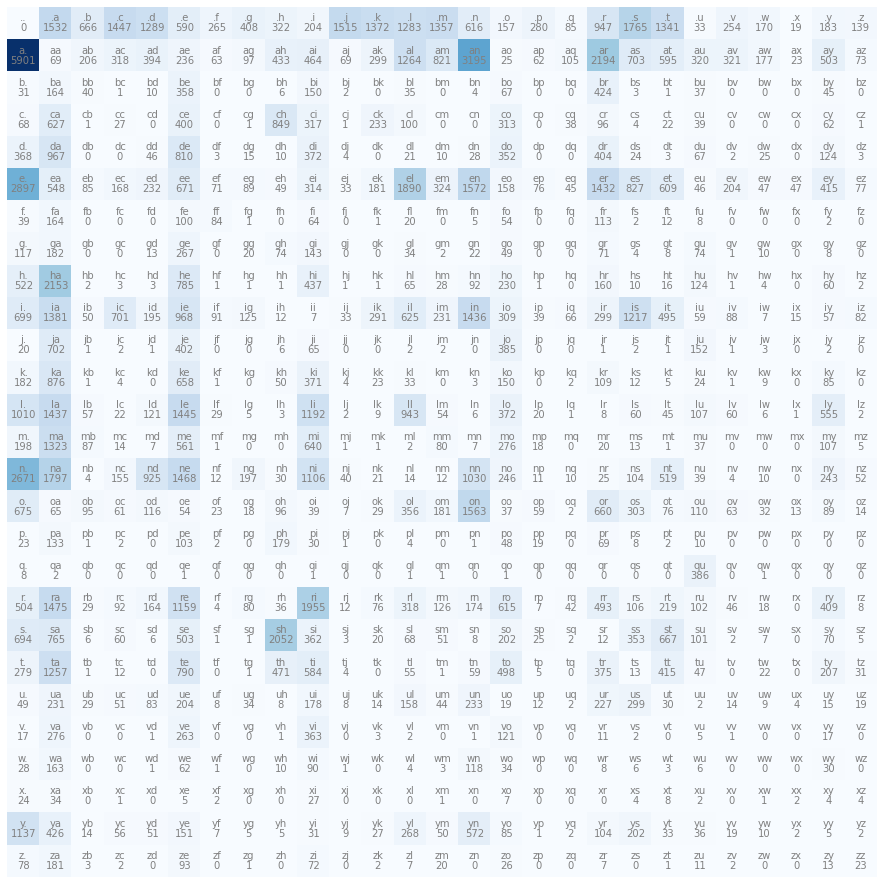

In [12]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

# Инициализация матрицы частот переходов между символами
N = torch.zeros((27, 27), dtype=torch.int32)

# Создание списка уникальных символов в данных и формирование словарей для преобразования символов в индексы (stoi) и обратно (itos)
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(stoi)

# Создание списка уникальных символов в данных и формирование словарей для преобразования символов в индексы (stoi) и обратно (itos)
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

# Визуализация матрицы частот переходов
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [13]:
# Частота Первых символов
print(N[0])

# Получение вероятностей перехода из начального состояния
p = N[0].float()
p = p / p.sum()
print(p)

# Инициализация генератора случайных чисел и генерация случайного индекса на основе распределения вероятностей
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
print("Засемплированный первый токен из распределения по names.txt: ", itos[ix])

tensor([   0, 1532,  666, 1447, 1289,  590,  265,  408,  322,  204, 1515, 1372,
        1283, 1357,  616,  157,  280,   85,  947, 1765, 1341,   33,  254,  170,
          19,  183,  139], dtype=torch.int32)
tensor([0.0000, 0.0840, 0.0365, 0.0793, 0.0707, 0.0323, 0.0145, 0.0224, 0.0177,
        0.0112, 0.0831, 0.0752, 0.0703, 0.0744, 0.0338, 0.0086, 0.0154, 0.0047,
        0.0519, 0.0968, 0.0735, 0.0018, 0.0139, 0.0093, 0.0010, 0.0100, 0.0076])
Засемплированный первый токен из распределения по names.txt:  m


In [29]:
# Создание матрицы вероятностей с учетом сглаживания и нормализация
P = (N+1).float()
P /= P.sum(1, keepdims=True)

# Генерация 5 случайных слов на основе матрицы вероятностей
for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

keonaviangililandarrimbierandido.
co.
trionne.
lisa.
ekerayqurtroharelila.


In [36]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["kate"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-315764.9688)
nll=tensor(315764.9688)
2.364253520965576


Количество примеров:  133558
torch.Size([133558, 27])


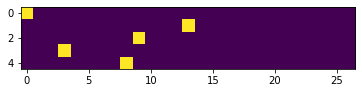

In [42]:
# Обучим нейросеть для предсказания
# Создадим для этого датасет (x, y)

import torch.nn.functional as F

xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('Количество примеров: ', num)

# Закодируем входной символ с помощью one-hot encoding
xenc = F.one_hot(xs, num_classes=27).float()
print(xenc.shape)
plt.imshow(xenc[:5])

In [43]:
learning_rate = 10
epochs = 1000

# Инициализация весов нейросети с помощью случайных чисел
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

# Градиентный спуск
for k in range(epochs):
  
    # Прямой проход
    # Нейросеть W предсказывает логарифм от количества встречаемости log(N)
    # [133558, 27] @ [27, 27] = [133558, 27]
    logits = xenc @ W
    # e^log(N) = N
    counts = logits.exp()
    # Получаем из счетчиков вероятности
    probs = counts / counts.sum(1, keepdims=True)
    
    # Вычисляем функцию потерь: 
    # отрицательный логарифм правдоподобия среднего значения 
    # плюс регуляризация
    
    # Из двухмерного массива probs берем элементы
    # Например, если probs имеет размер [5, 10] (5 строк, 10 столбцов)
    # и ys содержит [1, 2, 3, 4, 5], то результат будет 
    # массивом из 5 элементов, где каждый элемент - это значение из probs, 
    # находящееся на позиции (0,1), (1,2), (2,3), (3,4), (4,5) соответственно.
    
    
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    if k % 100 == 0:
        print(loss.item())

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -learning_rate * W.grad

3.809399127960205
2.4966912269592285
2.4321446418762207
2.4133734703063965
2.405167579650879
2.4007983207702637
2.398193597793579
2.396519422531128
2.3953802585601807
2.3945705890655518


In [45]:
# Теперь смотрим, какие имена нам сгенерировала нейросеть
g = torch.Generator().manual_seed(217447)
for i in range(5):
    out = []
    ix = 0
    while True:
    
        # ----------
        # Раньше:
        # p = P[ix]
        # ----------
        # Сейчас:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True) # Вероятность следующего токена
        # ----------

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mamobecke.
jerwakayttromanenen.
nishan.
joka.
araciquedonaranararicha.


## Задачи связанные с последовательностью

<img width=700 src='https://miro.medium.com/v2/resize:fit:1400/1*R5OTndVIJwAC16uFCmMARg.png' />

### Seq2Seq (Sequence to Sequence)

**Определение**: Seq2Seq модели обрабатывают последовательности ввода и вывода, где длины входной и выходной последовательностей могут быть разными. Эти модели часто используются в задачах, где требуется преобразование одной последовательности в другую.

**Примеры**:
1. **Перевод текста**: Например, перевод с английского на испанский. Здесь входная последовательность (предложение на английском) преобразуется в выходную последовательность (эквивалентное предложение на испанском).
2. **Резюмирование текста**: Входная последовательность (длинный текст) сжимается в более короткую выходную последовательность, которая содержит основные моменты исходного текста.
3. **Чат-боты**: Входная последовательность (вопрос пользователя) преобразуется в выходную последовательность (ответ бота).

### Seq2One (Sequence to One)

**Определение**: В Seq2One моделях входная последовательность преобразуется в одиночный выход (не последовательность). Эти модели широко используются в задачах классификации и регрессии, где входные данные являются последовательностями.

**Примеры**:
1. **Классификация эмоций**: Анализируя текст, модель определяет эмоциональный тон (например, положительный, отрицательный, нейтральный).
2. **Прогнозирование временных рядов**: На основе последовательности предыдущих значений временного ряда (например, цен на акции) модель предсказывает одно будущее значение (например, цену на следующий день).
3. **Анализ медицинских данных**: Определение наличия или отсутствия заболевания на основе временной последовательности показателей здоровья пациента.

### One2Seq (One to Sequence)

**Определение**: В One2Seq моделях одиночный вход преобразуется в последовательность выходных данных. Эти модели применимы в сценариях, где требуется генерация последовательностей из одного входного элемента.

**Примеры**:
1. **Генерация изображений из описаний**: На основе короткого текстового описания (например, "солнечный день на пляже") модель генерирует последовательность пикселей, формирующих соответствующее изображение.
2. **Генерация музыки**: Из одного музыкального мотива или звука модель создает целую мелодию или композицию.
3. **Текстовые подсказки в текстовых редакторах**: На основе одного слова или фразы модель генерирует предложения или абзацы текста.

Эти подходы демонстрируют разнообразие задач, которые можно решать с помощью моделей обработки естественного языка и других видов последовательностных данных.

### RNN (Recurrent Neural Network)

<img width=500 src='https://images.ctfassets.net/3viuren4us1n/fTI7OlJ6DrkeE05St3uf0/810c6207f985495c2b1b37cb7fc2d9db/2020-02-21_difference-between-cnn-rnn-1.webp' />

**Предыстория и Назначение:**
RNN были разработаны для работы с последовательностями данных (например, текстами, временными рядами), где важно учитывать предыдущий контекст. Они позволяют сохранять информацию из предыдущих шагов и использовать её на текущем шаге, что делает их идеальными для задач, связанных с последовательностями данных.

**Основная формула:**
$$
h_t = \sigma(W_{hh}h_{t-1} + W_{xh}x_t + b_h)
$$
где $ h_t $ - скрытое состояние на шаге $ t $, $ x_t $ - вход на шаге $ t $, $ W_{hh} $ и $ W_{xh} $ - веса, $ b_h $ - смещение, $ \sigma $ - функция активации.

<img width=500 src='http://vbystricky.ru/images/2021-05/rnn_with_recurrent_link.svg' />

**Затухающие и Взрывающиеся Градиенты:**
- В RNN, градиенты могут либо уменьшаться (затухать), либо увеличиваться (взрываться) экспоненциально по мере обратного распространения через слои.

#### Затухающие Градиенты (Vanishing Gradients)
Это явление происходит, когда веса сети слишком малы, что приводит к тому, что градиенты уменьшаются экспоненциально по мере того, как они обратно распространяются через каждый временной шаг. Это особенно заметно в длинных последовательностях, где информация о начальных входных данных теряется по мере продвижения через сеть.

**Причина**: При обратном распространении, градиенты умножаются на веса на каждом шаге. Если веса малы, это умножение приводит к уменьшению градиентов до того, как они достигнут входных слоев.

##### Проблема с Функцией Активации Сигмоиды
<img width=500 src='https://i.stack.imgur.com/06Fc1.png' />

1. **Ограниченный Диапазон Выходных Значений:** Сигмоида сжимает выходные значения в диапазоне между 0 и 1. Это означает, что большие положительные или отрицательные входы будут приведены к значениям близким к 1 или 0 соответственно.

2. **Производная Сигмоиды:** Производная функции сигмоида лежит в диапазоне от 0 до 0.25

3. **Эффект Затухания:** При обратном распространении через много слоев или временных шагов эти маленькие градиенты многократно умножаются друг на друга. В результате они могут стать настолько малыми, что перестают влиять на обновление весов в начальных слоях или временных шагах, что приводит к затуханию градиентов.

##### Использование tanh в RNN
В отличие от сигмоиды, функция активации гиперболический тангенс (tanh) имеет несколько преимуществ, которые делают ее более предпочтительной в RNN:

1. **Диапазон Выходных Значений:** `tanh` преобразует входные данные в диапазоне от -1 до 1, что предоставляет больший динамический диапазон по сравнению с сигмоидой.

2. **Производная:** от 0 до 1

Таким образом, использование `tanh` в RNN помогает смягчить проблему затухающих градиентов и улучшить обучение модели на данных с временными зависимостями.


#### Взрывающиеся Градиенты (Exploding Gradients)
**Причина**: Взрыв градиентов происходит, когда градиенты становятся слишком большими, и это обычно связано с большими весами. В результате градиенты увеличиваются экспоненциально в процессе обратного распространения.

**Решение**: Применение техник, таких как градиентное обрезание (gradient clipping), где градиенты ограничиваются определенным максимальным значением, может предотвратить взрыв градиентов и сохранить стабильность обучения.

##### Gradient clipping (обрезка градиентов) 
Это метод, используемый для предотвращения взрывающихся градиентов в обучении нейронных сетей, особенно в рекуррентных нейронных сетях (RNN). Основная идея состоит в том, чтобы ограничить величину градиентов так, чтобы они не превышали определённого порогового значения. Если величина градиента превышает этот порог, его значения уменьшаются пропорционально, сохраняя направление градиента.

Предположим, что у нас есть градиент $ \mathbf{g} $, и мы хотим ограничить его норму пороговым значением $ \theta $. Если норма градиента превышает $ \theta $, мы масштабируем градиент так, чтобы его норма стала равной $ \theta $. В математических терминах:

1. Вычисляем норму градиента:
   $$
   ||(\mathbf{g})|| = \sqrt{\sum_i g_i^2}
   $$

2. Если $||\mathbf{g}|| \geq \theta $, обрезаем градиент:
   $$
   \mathbf{g}' = \mathbf{g} \times \frac{\theta}{||\mathbf{g}||}
   $$

Здесь $ \mathbf{g}' $ — обрезанный градиент, который используется для обновления весов вместо исходного градиента $ \mathbf{g} $. Этот метод гарантирует, что норма обновлённого градиента не превысит пороговое значение $ \theta $, тем самым предотвращая взрывающиеся градиенты.

<img width=500 src='https://stanford.edu/~shervine/teaching/cs-230/illustrations/gradient-clipping-en.png' />

### LSTM (Long Short-Term Memory)

<img width=500 src='http://vbystricky.ru/images/2021-05/lstm_with_forget_gate.svg' />

**Предыстория и Назначение:**
LSTM были созданы для решения проблемы исчезающего градиента в RNN, позволяя модели лучше запоминать информацию на длительные периоды времени.

**Формулы блоков:**
1. Вентиль забывания (forget gate):
   $$
   f^{(t)} = \sigma\left(W^{fx} \cdot X^{(t)} + W^{fh} \cdot H^{(t-1)} + b_f\right)
   $$
2. Вентиль ввода (input gate):
   $$
    i^{(t)} = \sigma\left(W^{ix} \cdot X^{(t)} + W^{ih} \cdot H^{(t-1)} + b_i\right)
    $$
    $$
    g^{(t)} = \tanh\left(W^{gx} \cdot X^{(t)} + W^{gh} \cdot H^{(t-1)} + b_g\right)
    $$
3. Обновление состояния ячейки:
   $$
    S^{(t)} = g^{(t)} \odot i^{(t)} + S^{(t-1)} \odot f^{(t)}
    $$
    $$
    H^{(t)} = \phi\left(S^{(t)}\right) \odot o^{(t)}
   $$
4. Вентиль вывода (output gate):
   $$
   o^{(t)} = \sigma\left(W^{ox} \cdot X^{(t)} + W^{oh} \cdot H^{(t-1)} + b_o\right)
   $$

### GRU (Gated Recurrent Unit)

<img width=500 src='http://vbystricky.ru/images/2021-05/gru.svg' />

**Предыстория и Назначение:**
GRU - это упрощенная версия LSTM с меньшим количеством параметров, но с сохранением большей части преимуществ LSTM.

**Формулы блоков:**
1. Обновление ворот (update gate):
   $$
   z_t = \sigma(W_z \cdot [h_{t-1}, x_t])
   $$
2. Сброс ворот (reset gate):
   $$
   r_t = \sigma(W_r \cdot [h_{t-1}, x_t])
   $$
3. Кандидат на новое состояние:
   $$
   \tilde{h}_t = \tanh(W \cdot [r_t * h_{t-1}, x_t])
   $$
4. Финальное состояние:
   $$
   h_t = (1 - z_t) * h_{t-1} + z_t * \tilde{h}_t
   $$


#### Недостатки RNN и LSTM:
1. **Последовательная обработка**: RNN и LSTM обрабатывают данные последовательно, что затрудняет параллельную обработку и масштабирование.
2. **Проблема длительных зависимостей**: Несмотря на улучшения с LSTM, RNN все равно актуальна проблема длительных зависимостей в данных.

Трансформеры решают эти проблемы, используя механизмы внимания, которые позволяют модели одновременно обрабатывать разные части входных данных, что улучшает скорость обучения и позволяет лучше улавливать длительные зависимости.

### Трансформеры и их основные компоненты

Трансформеры — это архитектура, предложенная в статье "Attention is All You Need" в 2017 году. Они принципиально отличаются от RNN и LSTM, предлагая новый подход к обработке последовательностей.

<img width=500 src='https://jalammar.github.io/images/t/the_transformer_3.png' />

#### Преимущества трансформеров:
- **Параллельная обработка данных**: В отличие от RNN и LSTM, трансформеры обрабатывают все элементы последовательности одновременно, что позволяет эффективно использовать параллелизм на современных вычислительных установках.
- **Эффективное обучение на длинных последовательностях**: Благодаря механизму внимания трансформеры могут лучше улавливать длинные зависимости в данных.

<img width=500 src='https://jalammar.github.io/images/t/The_transformer_encoders_decoders.png' />

<img width=500 src='https://jalammar.github.io/images/t/Transformer_decoder.png' />

<img width = 500 src='https://madewithml.com/static/images/foundations/transformers/architecture.png' />


#### Ключевые элементы трансформера:

1. **Positional Encoding**: Добавляет информацию о позиции элементов в последовательности, компенсируя отсутствие явной последовательной обработки данных.

2. **Многоголовый механизм внимания (Multi-Head Attention)**: Позволяет модели одновременно фокусироваться на разных частях входных данных, повышая эффективность обработки информации.

#### Positional Encoding:

<img width=500 src='https://jalammar.github.io/images/t/attention-is-all-you-need-positional-encoding.png'> 

В оригинальной статье используется следующая стратегия для positional encoding:

$$
PE_{(pos, 2i)} = \sin\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)
$$
$$
PE_{(pos, 2i+1)} = \cos\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)
$$

Где:
- $ pos $ - позиция элемента в последовательности.
- $ i $ - индекс в векторе positional encoding.
- $ d_{\text{model}} $ - размерность модели.

Эта стратегия позволяет каждому элементу в последовательности иметь уникальное кодирование, отражающее его позицию, и поддерживает обучение модели на улавливание зависимостей между элементами в зависимости от их положения в последовательности.

<img width=500 src='https://jalammar.github.io/images/t/transformer_positional_encoding_example.png' />

### Многоголовый механизм внимания (Multi-Head Attention)

Многоголовый механизм внимания в трансформерах позволяет модели одновременно обращать внимание на информацию из разных представлений на разных уровнях. Это увеличивает способность модели фокусироваться на важных деталях и улавливать разнообразные аспекты информации.

<img width=500 src='https://www.researchgate.net/publication/346522738/figure/fig5/AS:1023954093350924@1621141088878/A-visualization-of-a-learned-self-attention-head-on-a-sentence-The-visualization-shows.ppm' />

<img width=500 src='https://slds-lmu.github.io/seminar_nlp_ss20/figures/02-02-attention-and-self-attention-for-nlp/bahdanau-fig3.png' />

#### Компоненты Multi-Head Attention:

1. **Линейные преобразования**:
   - Каждый из векторов запросов $ Q $, ключей $ K $ и значений $ V $ проходит через линейные преобразования для каждой "головы" внимания. Это делается для создания различных представлений данных для каждой головы.
<img width=500 src='https://jalammar.github.io/images/t/self-attention-matrix-calculation.png' />

<img width=500 src='https://jalammar.github.io/images/t/transformer_self_attention_vectors.png' />

2. **Scaled Dot-Product Attention**:
   - Это основной механизм внимания, где взвешенные суммы значений рассчитываются на основе сходства запросов и ключей.
   - Формула: $\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$
   - $ d_k $ - размерность ключей, делитель используется для масштабирования и предотвращения слишком больших значений внутри softmax, что может привести к затруднениям в обучении.

<img width=500 src='https://jalammar.github.io/images/t/self-attention-output.png' />
<img width=500 src='https://jalammar.github.io/images/t/self-attention-matrix-calculation-2.png' />

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

3. **Конкатенация и финальное линейное преобразование**:
   - После того как каждая "голова" внимания вычислила свои взвешенные суммы, результаты конкатенируются и проходят через ещё одно линейное преобразование для получения окончательного выхода многоголового внимания.

#### Mask в Scaled Dot-Product Attention:

Маска используется для контроля над тем, какие значения должны учитываться при вычислении внимания. Важно в следующих ситуациях:

**Предотвращение "самовнимания" в будущем**:
   - В задачах, где порядок последовательности важен (например, в машинном переводе), маска предотвращает учет будущей информации. Это помогает сохранить причинно-следственную связь в данных.


<img width=500 src='https://peterbloem.nl/files/transformers/masked-attention.svg' />

В области нейронных сетей и, в частности, в обработке естественного языка (NLP), модели трансформеров обычно делятся на две категории: основанные на энкодере и основанные на декодере.

### Encoder-Based Models (Модели на Основе Энкодера)

**Примеры:**
- **BERT (Bidirectional Encoder Representations from Transformers)**: предназначен для понимания контекста и смысла входных текстовых данных.
- **RoBERTa (Robustly optimized BERT approach)**: улучшенная версия BERT с изменениями в процессе предобучения.

### Decoder-Based Models (Модели на Основе Декодера)

**Примеры:**
- **GPT (Generative Pretrained Transformer)**: фокусируется на генерации текста, продолжая заданную последовательность слов.
- **OpenAI's GPT-2 и GPT-3**: более продвинутые версии с улучшенной способностью к генерации текста.

### BERT (Bidirectional Encoder Representations from Transformers)


[BERT](https://huggingface.co/spaces/docs-demos/bert-base-uncased) — это метод обучения представлений языка, основанный на трансформерах, который значительно улучшил результаты в широком спектре задач обработки естественного языка.

#### Как работает BERT:

1. **Двунаправленная архитектура**:
   - BERT учится представлять языковые данные, учитывая контекст со всех сторон, а не только слева направо или справа налево. Это достигается благодаря использованию механизма внимания, который позволяет каждому слову "видеть" все остальные слова в предложении.

2. **Трансформеры**:
   - BERT основан на архитектуре трансформера, особенно на его энкодере. Трансформеры позволяют эффективно обрабатывать последовательности данных.

3. **Предобучение и тонкая настройка**:
   - BERT предварительно обучается на большом корпусе текста (например, Wikipedia), а затем тонко настраивается для конкретных задач (например, классификации текста, вопросно-ответных систем).

#### Обучение BERT:

##### 1. **Задача классификации пар предложений (The Next Sentence Prediction, NSP)**

**Цель задачи:** предсказать, следует ли одно предложение за другим в оригинальном тексте. Эта задача помогает модели понимать связи между предложениями.

**Пример:**
- Предложение A: "Я пошел на прогулку."
- Предложение B: "На улице было тепло."
- Модель должна определить, следует ли эти предложения друг за другом в оригинальном тексте.


##### 2. **Задача маскирования токенов (Masked Language Model, MLM)**

**Цель задачи:** предсказать слово, скрытое за специальным токеном маскирования (например, `[MASK]`). Это тренирует модель понимать контекст и заполнять пробелы в предложениях.

**Пример:**
- Исходное предложение: "Сегодня я иду в кино."
- Предложение с маскированием: "Сегодня я иду в [MASK]."
- Модель должна предсказать слово, которое наиболее вероятно находится на месте `[MASK]` (в данном случае, например, "кино").

Эти две задачи были ключевыми для предобучения BERT, обеспечивая понимание как локального контекста (через MLM), так и более широких связей между предложениями (через NSP).

![](https://miro.medium.com/v2/resize:fit:412/1*ZLxPJwuHALDLTdqZfxhVNw.png)

В моделях, основанных на архитектуре BERT, используются специальные токены, такие как `[CLS]` и `[SEP]`, для выполнения определённых задач и улучшения понимания контекста. Вот основная информация о них:

### Токен `[CLS]` (Classify)
- **Назначение:** Этот токен добавляется в начало каждого ввода (входной последовательности).
- **Использование:** В задачах классификации вывод (то есть векторное представление) этого токена после прохождения через модель используется как агрегированное представление всего ввода. Например, в задачах бинарной или многоклассовой классификации именно этот вектор подается на полносвязный слой для предсказания класса.

### Токен `[SEP]` (Separator)
- **Назначение:** Этот токен служит в качестве разделителя между разными частями ввода, такими как отдельные предложения или предложение и вопрос.
- **Использование:** В задачах, где требуется обработка пары предложений (например, вопрос и ответ, или два предложения для определения их логической связи), токен `[SEP]` используется для разделения этих предложений. Это помогает модели понимать, где заканчивается одно предложение и начинается другое.

Эти токены являются важной частью входных данных для моделей, основанных на трансформерах, поскольку они обеспечивают дополнительные сигналы о структуре входных данных, что улучшает качество обучения и предсказаний.


## Bert-base и Bert-large

[Вариации](https://huggingface.co/transformers/v2.9.1/pretrained_models.html)

В модели BERT различные параметры, такие как "12-layer", "768-hidden", "12-heads", указывают на конфигурацию и размер архитектуры модели. Давайте разберем, что каждый из этих параметров означает:

1. **12-layer**: Это количество слоев (или блоков) трансформера в модели. Каждый слой состоит из подслоев, включая механизм внимания (attention) и полносвязный слой. В BERT-Base используется 12 таких слоев.

![](https://jalammar.github.io/images/bert-base-bert-large-encoders.png)

2. **768-hidden**: Это размер скрытого слоя, т.е. количество нейронов в скрытом слое каждого блока трансформера. В BERT-Base на каждом слое 768 нейронов.

3. **12-heads**: Это количество "голов" в механизме многоголового внимания (multi-head attention) в каждом слое. "Головы" внимания позволяют модели одновременно сосредотачиваться на разных частях входных данных. В BERT-Base используется 12 таких "голов" в каждом слое.

![](https://d3mlabs.de/wp-content/uploads/2023/04/image-2.png)

### BERT-Base и BERT-Large:

- **BERT-Base:**
  - Слои (Layers): 12
  - Скрытые слои (Hidden size): 768
  - Головы внимания (Attention heads): 12
  - Всего параметров: около 110 миллионов

- **BERT-Large:**
  - Слои (Layers): 24
  - Скрытые слои (Hidden size): 1024
  - Головы внимания (Attention heads): 16
  - Всего параметров: около 340 миллионов

BERT-Large с его увеличенной глубиной и размером слоев обладает большей мощностью и способностью к обучению на сложных языковых данных, однако это также требует больше вычислительных ресурсов и времени для обучения и инференса.

# Decoder-based модели

Модели, основанные на декодере, предназначены для генерации текста и обычно используются в задачах, где требуется продолжить данную последовательность слов или фраз. Одним из наиболее известных примеров таких моделей является GPT (Generative Pre-trained Transformer).

![](https://miro.medium.com/v2/resize:fit:1400/1*bNQLzSDDD_9VO6P2_8bL6Q.png)

### Особенности GPT:
1. **Структура:** GPT состоит исключительно из блоков, подобных декодеру трансформера. Он использует механизм внимания (attention).

2. **Обучение:** GPT обучается на большом корпусе текстовых данных в режиме предсказания следующего слова. Это означает, что модель обучается генерировать следующее слово в последовательности на основе предыдущих слов.

3. **Функции внимания:** GPT использует маскированный механизм внимания, который позволяет каждому слову в последовательности "видеть" только предшествующие ему слова. Это предотвращает "утечку" информации из будущих слов при генерации текста.

4. **Применение:** После предварительного обучения GPT может быть дообучен (fine-tuned) для различных задач, таких как генерация текста, перевод, ответы на вопросы и многие другие. 

5. **Масштабируемость:** GPT обладает хорошей масштабируемостью, что позволяет улучшать его производительность с увеличением количества данных и размеров модели.

6. **Передовые версии:** GPT-3, последняя версия на момент моего последнего обновления, является одной из крупнейших и наиболее мощных моделей, способных генерировать высококачественный текст и решать широкий спектр задач.
